# Contexte du projet


Vous venez de lancer votre société de conseil dans le domaine de la data et d’IA avec votre associé. Après un travail de prospection, vous rentrez en compétition dans un premier appel d’offre : Assur’aimant, un assureur français opérant historiquement à un niveau national, décide de s’implanter aux États-Unis. L’assureur sollicite plusieurs société dans l’IA pour créer une solution qui pourrait permettre d’estimer la prime d’assurance de ses souscripteurs sur ce marché. Actuellement, afin de pouvoir estimer les primes d’assurance les courtiers utilisent des ratios et leur expérience, cependant cette méthode est longue et coûteuse.

Suite à plusieurs échanges, vous vous êtes rendu dans les locaux d’Assur’Aimant à Houston pour constituer un jeu de données exploitable pour votre modélisation. Vous avez notamment extrait les informations suivantes :

l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9 le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme l’âge (age): l'âge du principal bénéficiaire le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance smoker : fumeur ou non-fumeur région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest charges : la prime d’assurance facturée (cible)

L’équipe de direction d’Assur’aimant vous demande également de réaliser une analyse des données afin qu’elle puisse mieux connaître ses clients. Votre objectif est donc double :

Réalisez une étude exploratoire des données Réalisez un modèle de machine learning qui estimera les primes d’assurance des clients en fonction de leur données démographiques.

Étant donnée votre petite structure, vous êtes polyvalents et vous endossez tous les deux les rôles de data scientist / data analyst / data engineer. Vous êtes des full stack data.



3. **Analyse univariée :** Analysez chaque variable indépendamment.
4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.
5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.
6. **Visualisations graphiques :**
    - Utilisez des box plots ou violin plots (outil : `seaborn`).
7. **Validation des hypothèses :** Utilisez des tests statistiques.
8. **Visualisations :** Appuyez chaque point par des graphiques pertinents.

In [7]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

### Partie Analyse :

1. **Vérifiez les informations manquantes et les doublons** (outil : `missingno`).

In [ ]:
# Load dataset
df = pd.read_csv("assurance_dataset.csv")

In [ ]:
# View first 10 data rows
df.head(10)

In [ ]:
# View data types for each variable
df.dtypes

In [ ]:
# Check for missing data (in numbers)
df.isna().sum()

In [ ]:
# Check for missing data (vizualization)
msno.bar(df) 

In [ ]:
# Check for duplicates
df.duplicated().count()

In [ ]:
# Confirm the number of regions in dataset
df['region'].unique()

In [ ]:
# Round bmi to 2 decimal places

df['bmi'] = df['bmi'].apply(lambda x: round(x, 2))

In [ ]:
# Round charges to 2 decimal places
df['charges'] = df['charges'].apply(lambda x: round(x, 2))

In [ ]:
# Convert smokers column to numeric
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == "yes" else 0)

In [31]:
# Convert sex column to numeric
df['sex'] = df['sex'].apply(lambda x: 1 if x == "male" else 0)

2. **Détection des valeurs aberrantes.**

Text(5.069444444444445, 0.5, 'Frequency')

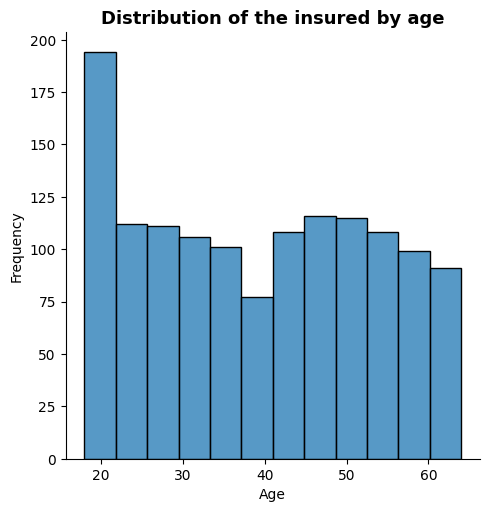

In [ ]:
# Distribution of the insured by age
sns.displot(df, x = 'age', kind='hist')
plt.title("Distribution of the insured by age", fontsize= 13, weight = "bold")
plt.xlabel("Age", weight = 10)
plt.ylabel("Frequency", weight = 10)

Text(5.069444444444445, 0.5, 'Frequency')

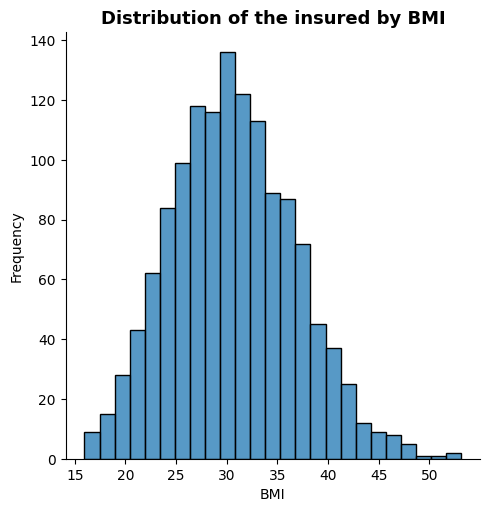

In [ ]:
# Distribution of the insured by bmi (body:mass index)
sns.displot(df, x = 'bmi', kind='hist')
plt.title("Distribution of the insured by BMI", fontsize= 13, weight = "bold")
plt.xlabel("BMI", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [55]:
# Find number of people with "outlier" BMI values

insured_with_high_bmi = df.loc[df['bmi'] > 48, :]

num_with_high_bmi = insured_with_high_bmi.count()

num_with_high_bmi

age         5
sex         5
bmi         5
children    5
smoker      5
region      5
charges     5
dtype: int64

In [ ]:
# Drop rows with BMI values > 48

df = df.drop(insured_with_high_bmi)

Text(5.069444444444445, 0.5, 'Frequency')

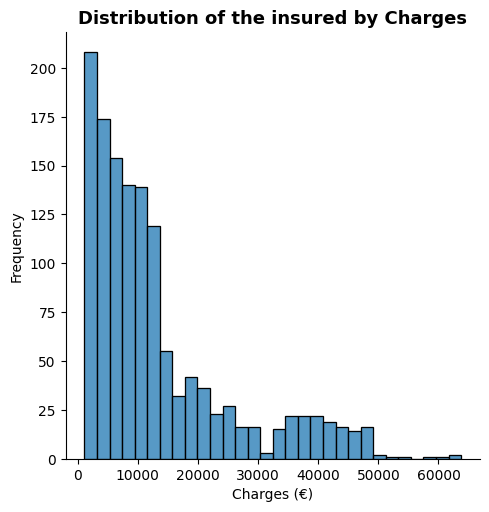

In [52]:
# Distribution of the insured by charges
sns.displot(df, x = 'charges', kind='hist')
plt.title("Distribution of the insured by charges", fontsize= 13, weight = "bold")
plt.xlabel("Charges (€)", weight = 10)
plt.ylabel("Frequency", weight = 10)

In [54]:
high_charges = df.loc[df['charges'] > 50000, :].count()

high_charges

age         7
sex         7
bmi         7
children    7
smoker      7
region      7
charges     7
dtype: int64